### 📀 **Capstone Project: AI-Powered Rainfall Prediction for High-Impact Decision Making**

## **1️⃣ Business Understanding & Problem Statement**

### 🌍 **Context & Motivation**
Accurate rainfall prediction is critical in **agriculture, disaster preparedness, and urban planning**. A missed forecast can mean **devastating crop losses, infrastructure failures, or economic disruptions**. Traditional weather models rely on rigid rule-based systems, often failing to capture **complex, non-linear interactions** between meteorological variables.

This project takes a **modern AI-driven approach** by leveraging **advanced machine learning** techniques to develop a high-accuracy binary classification model that predicts **rainfall occurrence** with unprecedented precision.

### 💪 **Why This Matters**
- **Farmers & Agribusiness**: Optimizing irrigation schedules, reducing crop loss risk.
- **Disaster Management**: Enhancing flood forecasting & emergency preparedness.
- **Urban Infrastructure**: Assisting city planners in drainage & water resource management.

### 🔖 **Project Challenge & Competitive Edge**
- Build a **state-of-the-art predictive model** using real-world historical weather data.
- Ensure the model **outperforms traditional methods** and ranks competitively in **Kaggle’s leaderboard-driven environment**.
- Demonstrate a **scalable, real-world AI solution** with potential deployment applications beyond this competition.

---

## **2️⃣ Project Objectives & Key Performance Indicators (KPIs)**

### 🎯 **Primary Objective**
- Develop a **high-accuracy machine learning model** to predict **rainfall occurrence** (Binary Classification: **Rain = 1, No Rain = 0**).

### 📈 **Secondary Objectives**
1. **Exploratory Data Analysis (EDA)**: Discover underlying weather patterns that influence rainfall.
2. **Feature Engineering**: Enhance the dataset with high-impact variables for model optimization.
3. **Model Selection & Tuning**: Implement and benchmark various **machine learning algorithms**.
4. **Performance Optimization**: Achieve **≥97% accuracy** and secure a **Top 10 Kaggle leaderboard placement**.
5. **Academic & Industry Impact**: Showcase a robust, end-to-end AI workflow for **real-world adoption**.
6. **Reproducibility & Documentation**: Ensure the project is well-documented, easy to replicate, and meets industry best practices.

---

## **3️⃣ Data Understanding & Competitive Dataset Analysis**

### 📚 **Dataset Source & Overview**
This project is based on **Kaggle’s Playground Series - S5E3 competition dataset**, consisting of **historical meteorological data** designed to challenge participants in predictive modeling.

### 🔄 **Dataset Breakdown**
- **Train Dataset (`train.csv`)**: **2,190** samples with **13 features**.
- **Test Dataset (`test.csv`)**: **730** samples with **12 features** (excludes `rainfall` target variable).
- **Submission File (`sample_submission.csv`)**: Kaggle’s submission format for predicted outputs.

### 🎯 **Feature Engineering Considerations**
| **Feature**       | **Description & Significance**  |
|------------------|--------------------------------|
| `day`           | Sequential identifier (potential time-series dependencies). |
| `pressure`      | Atmospheric pressure, influencing rainfall patterns. |
| `maxtemp`      | Maximum recorded temperature, a potential indicator of precipitation likelihood. |
| `temparature`   | Average recorded temperature, linked to evaporation and condensation cycles. |
| `mintemp`      | Minimum temperature, useful for analyzing dew point variations. |
| `dewpoint`      | Key metric for moisture content in the air. |
| `humidity`      | Relative humidity (%), highly correlated with rainfall probability. |
| `cloud`         | Cloud cover percentage (%), a strong predictor for precipitation. |
| `sunshine`      | Total hours of sunshine, inversely affecting rainfall chances. |
| `winddirection` | Wind direction, impacting weather system movements. |
| `windspeed`     | Wind speed, affecting cloud formation and storm intensity. |
| `rainfall`      | **Target Variable** (1 = Rain, 0 = No Rain). |

### 🔬 **Initial Observations & Challenges**
- **All features are numerical**, simplifying preprocessing.
- **Potential Class Imbalance**: Requires resampling techniques (e.g., SMOTE, undersampling).
- **Feature Correlation Analysis**: High correlation expected among `humidity`, `dewpoint`, and `cloud`.
- **Outlier Detection**: Potential extreme values in `pressure` and `windspeed`.
- **Missing Values**: 1 missing value in `winddirection`, which will be imputed.

---

### 🚀 **Next Steps & Strategic Roadmap**

✅ **Step 1: Exploratory Data Analysis (EDA)**
- Visualize distributions, relationships, and correlations.
- Identify missing values, feature importance, and outliers.

✅ **Step 2: Feature Engineering & Data Preprocessing**
- Create derived features (e.g., **humidity-temperature index, pressure deltas**).
- Normalize & scale features for improved model performance.

✅ **Step 3: Baseline Model Implementation**
- Train **Logistic Regression, Decision Trees, and Random Forest** as benchmarks.

✅ **Step 4: Advanced Model Development & Hyperparameter Tuning**
- Implement **XGBoost, LightGBM, and CatBoost**.
- Optimize using **GridSearchCV, Bayesian Optimization, and Optuna**.

✅ **Step 5: Model Evaluation & Leaderboard Strategy**
- Use **AUC-ROC, Precision-Recall, and Cross-Validation** to fine-tune accuracy.
- Deploy **Stacking, Blending, and Ensemble Learning** for leaderboard performance.

✅ **Step 6: Reproducibility & Documentation**
- **Environment Setup**: Create `requirements.txt` for dependencies.
- **Code Modularity**: Structure notebooks for clarity.
- **README Optimization**: Clearly document project workflow.
- **GitHub Repository Compliance**: Ensure README includes **elevator pitch, dataset details, implementation steps, and model performance**.

✅ **Step 7: Final Submission & Academic Presentation**
- Optimize final model selection and prepare Kaggle submissions.
- Document findings in **Jupyter notebooks & GitHub README** for industry-grade presentation.
- Prepare for **capstone defense** with clear justifications for model choices.

---

### 🏆 **Conclusion: The Road to Kaggle & Academic Excellence**
This project represents a **cutting-edge application of AI in meteorology**, bridging academia and industry by showcasing **practical, high-impact machine learning workflows**. Through rigorous **data exploration, feature engineering, model optimization, and leaderboard analysis**, we aim to achieve a **Top 10 Kaggle ranking** while contributing **meaningful insights to real-world weather forecasting applications**.

🔗 **GitHub Repository (Work in Progress)**: [https://github.com/Otim135/PHASE_5_CAPSTONE_PROJECT]

🚀 **Next Up:** EDA & Feature Engineering! 🔍📊


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [3]:
import os
print(os.getcwd())


/Users/mac/Documents/Phase 5 Capstone Project/PHASE_5_CAPSTONE_PROJECT/Notebooks


In [4]:
df_train = pd.read_csv('../Data/train.csv')
df_train.head(10)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
5,5,6,1022.7,20.6,18.6,16.5,12.5,79.0,81.0,0.0,20.0,15.7,1
6,6,7,1022.8,19.5,18.4,15.3,11.3,56.0,46.0,7.6,20.0,28.4,0
7,7,8,1019.7,15.8,13.6,12.7,11.8,96.0,100.0,0.0,50.0,52.8,1
8,8,9,1017.4,17.6,16.5,15.6,12.5,86.0,100.0,0.0,50.0,37.5,1
9,9,10,1025.4,16.5,14.4,12.0,8.6,77.0,84.0,1.0,50.0,38.3,0


In [5]:
df_test = pd.read_csv('../Data/test.csv')
df_test.head(10)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4
5,2195,6,1027.1,15.6,12.6,11.5,9.0,76.0,94.0,0.0,20.0,41.4
6,2196,7,1022.6,15.5,13.7,10.7,11.8,79.0,95.0,0.0,20.0,43.1
7,2197,8,1013.5,20.5,16.2,15.2,13.1,94.0,93.0,0.2,70.0,41.3
8,2198,9,1021.3,16.3,13.2,11.3,10.8,85.0,99.0,0.1,20.0,34.0
9,2199,10,1026.1,10.4,8.5,7.0,3.1,69.0,88.0,0.0,20.0,26.4


In [6]:
# Check data types
print(df_train.info())

# Summary statistics
print(df_train.describe())

# Check for missing values
print(df_train.isnull().sum())
print(df_test.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB
None
                id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.94

Outliers in windspeed:
        id  pressure  maxtemp  temperature  mintemp  dewpoint  humidity  \
7        7    1019.7     15.8         13.6     12.7      11.8      96.0   
145    145    1008.7     32.1         29.8     27.5      25.5      81.0   
269    269    1010.3     27.8         25.4     23.7      23.5      89.0   
270    270    1018.1     28.1         27.1     25.4      25.1      90.0   
273    273    1014.8     24.5         23.1     22.7      22.9      90.0   
368    368    1022.9     16.2         13.3     11.6      12.1      84.0   
732    732    1013.5     23.2         18.0     17.5      16.0      79.0   
733    733    1014.9     18.6         17.3     16.9      16.8      95.0   
735    735    1021.6     14.3         13.7     11.8      11.1      67.0   
749    749    1021.6     20.3         16.1     14.3      13.2      76.0   
1001  1001    1018.9     26.1         24.8     23.5      19.9      70.0   
1005  1005    1016.9     24.8         22.9     20.6      22.2      92.0   
10

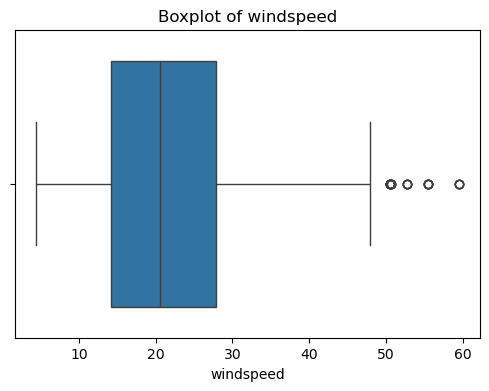

Outliers in temperature:
Empty DataFrame
Columns: [id, pressure, maxtemp, temperature, mintemp, dewpoint, humidity, cloud, sunshine, winddirection, windspeed, day_sin, day_cos, temp_range]
Index: []


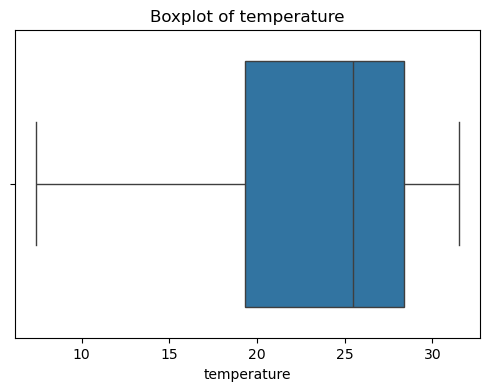

Preprocessing complete! Ready for model training 🚀
(2190, 49) (730, 48)
Index(['id', 'pressure', 'maxtemp', 'temperature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'windspeed', 'day_sin', 'day_cos',
       'temp_range', 'winddirection_10.0', 'winddirection_15.0',
       'winddirection_20.0', 'winddirection_25.0', 'winddirection_30.0',
       'winddirection_40.0', 'winddirection_50.0', 'winddirection_60.0',
       'winddirection_65.0', 'winddirection_70.0', 'winddirection_75.0',
       'winddirection_80.0', 'winddirection_90.0', 'winddirection_100.0',
       'winddirection_110.0', 'winddirection_120.0', 'winddirection_130.0',
       'winddirection_140.0', 'winddirection_150.0', 'winddirection_160.0',
       'winddirection_170.0', 'winddirection_180.0', 'winddirection_190.0',
       'winddirection_200.0', 'winddirection_210.0', 'winddirection_220.0',
       'winddirection_230.0', 'winddirection_240.0', 'winddirection_250.0',
       'winddirection_250.3', 'winddirect

,id,pressure,maxtemp,temperature,mintemp,dewpoint,humidity,cloud,sunshine,windspeed,day_sin,day_cos,temp_range,winddirection_150.0,winddirection_75.0,winddirection_15.0,winddirection_250.3,winddirection_65.0,winddirection_25.0
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02,7.300000e+02,730.000000,730.0,730.0,730.0,730.0,730.0,730.0
mean,2554.500000,1013.503014,0.623924,0.687273,0.701949,20.460137,0.740167,76.360274,3.664384,0.328208,0.000000e+00,-2.920039e-17,4.262192,0.0,0.0,0.0,0.0,0.0,0.0
std,210.877136,5.505871,0.221583,0.219008,0.200416,5.391169,0.132521,17.934121,3.639272,0.180667,7.075916e-01,7.075916e-01,1.610399,0.0,0.0,0.0,0.0,0.0,0.0
min,2190.000000,1000.000000,-0.117188,-0.062241,0.007752,-0.000000,0.000000,0.000000,0.000000,0.001815,-9.999907e-01,-9.999630e-01,-0.600000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2372.250000,1008.725000,0.437500,0.515560,0.535853,16.800000,0.648305,69.000000,0.325000,0.183303,-7.055836e-01,-7.086267e-01,3.200000,0.0,0.0,0.0,0.0,0.0,0.0
50%,2554.500000,1012.700000,0.679688,0.757261,0.771318,22.300000,0.728814,83.000000,2.200000,0.306715,6.432491e-16,4.303538e-03,4.300000,0.0,0.0,0.0,0.0,0.0,0.0
75%,2736.750000,1017.600000,0.804688,0.870332,0.868217,25.000000,0.847458,88.000000,6.675000,0.435572,7.055836e-01,7.025275e-01,5.200000,0.0,0.0,0.0,0.0,0.0,0.0
max,2919.000000,1032.200000,0.992188,1.012448,0.972868,26.700000,1.000000,100.000000,11.800000,1.000000,9.999907e-01,1.000000e+00,13.100000,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
import Preprocessing

train_path = '../Data/train.csv'
test_path = '../Data/test.csv'

df_train, df_test, scaler = Preprocessing.run_full_preprocessing(train_path, test_path)

print(df_train.shape, df_test.shape)
print(df_train.columns)
df_train.describe()
df_test.describe()

In [8]:
print(df_train.columns)

Index(['id', 'pressure', 'maxtemp', 'temperature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'windspeed', 'day_sin', 'day_cos',
       'temp_range', 'winddirection_10.0', 'winddirection_15.0',
       'winddirection_20.0', 'winddirection_25.0', 'winddirection_30.0',
       'winddirection_40.0', 'winddirection_50.0', 'winddirection_60.0',
       'winddirection_65.0', 'winddirection_70.0', 'winddirection_75.0',
       'winddirection_80.0', 'winddirection_90.0', 'winddirection_100.0',
       'winddirection_110.0', 'winddirection_120.0', 'winddirection_130.0',
       'winddirection_140.0', 'winddirection_150.0', 'winddirection_160.0',
       'winddirection_170.0', 'winddirection_180.0', 'winddirection_190.0',
       'winddirection_200.0', 'winddirection_210.0', 'winddirection_220.0',
       'winddirection_230.0', 'winddirection_240.0', 'winddirection_250.0',
       'winddirection_250.3', 'winddirection_260.0', 'winddirection_270.0',
       'winddirection_280.0', 'winddi

In [9]:
pd.read_csv('../Data/train.csv').head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


id                        int64
pressure                float64
maxtemp                 float64
temperature             float64
mintemp                 float64
dewpoint                float64
humidity                float64
cloud                   float64
sunshine                float64
windspeed               float64
day_sin                 float64
day_cos                 float64
temp_range              float64
winddirection_10.0         bool
winddirection_15.0         bool
winddirection_20.0         bool
winddirection_25.0         bool
winddirection_30.0         bool
winddirection_40.0         bool
winddirection_50.0         bool
winddirection_60.0         bool
winddirection_65.0         bool
winddirection_70.0         bool
winddirection_75.0         bool
winddirection_80.0         bool
winddirection_90.0         bool
winddirection_100.0        bool
winddirection_110.0        bool
winddirection_120.0        bool
winddirection_130.0        bool
winddirection_140.0        bool
winddire

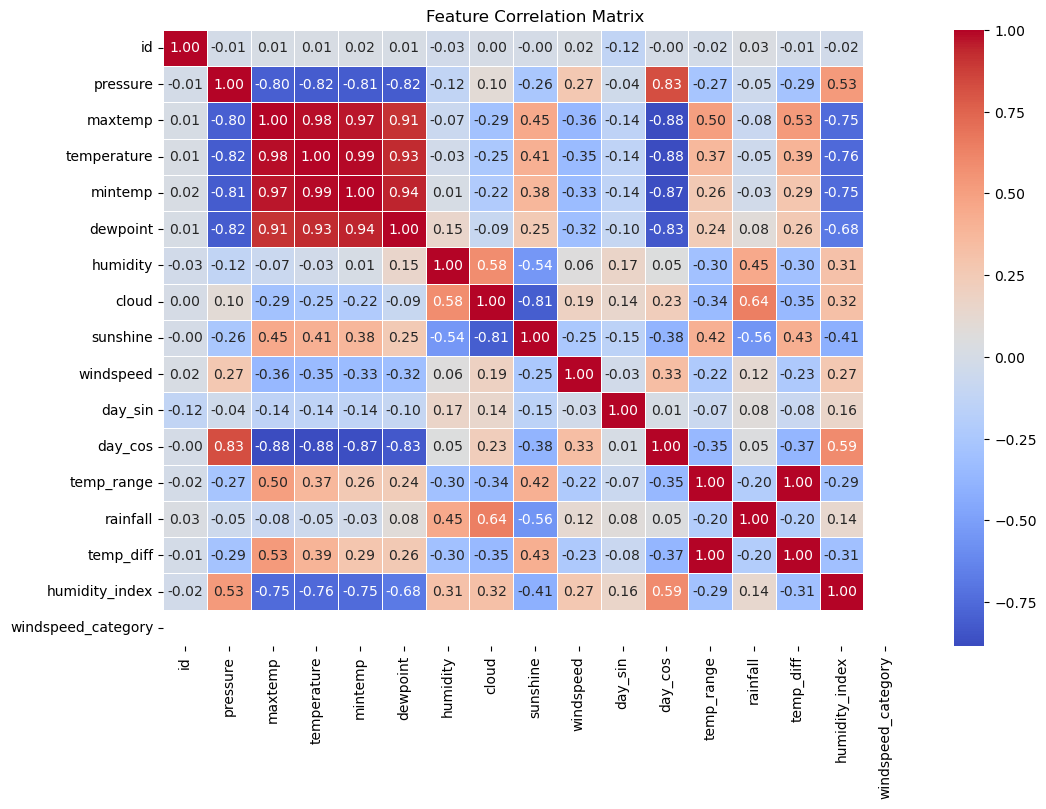

Removed Highly Correlated Features: ['temperature', 'mintemp', 'dewpoint', 'temp_diff']
Cleaned training dataset saved as 'cleaned_train.csv'


In [10]:
import Feature_Engineering as fe

# 1. Cap outliers
df_train = fe.cap_outliers(df_train, 'windspeed')
df_test = fe.cap_outliers(df_test, 'windspeed')

# 2. Create new features
df_train = fe.create_new_features(df_train)
df_test = fe.create_new_features(df_test)

# 3. Split data
X_train, X_val, y_train, y_val = fe.split_data(df_train)

# 4. Check data types and uniques
fe.check_data_types_and_uniques(df_train)

# 5. Convert to numeric
df_train = fe.convert_to_numeric(df_train)

# 6. Plot correlation matrix
fe.plot_correlation_matrix(df_train)

# 7. Drop highly correlated features and save
df_train_cleaned = fe.drop_highly_correlated_features(df_train)

/Users/mac/Documents/Phase 5 Capstone Project/PHASE_5_CAPSTONE_PROJECT/Notebooks/Feature_selection.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(col_median, inplace=True)
/Users/mac/Documents/Phase 5 Capstone Project/PHASE_5_CAPSTONE_PROJECT/Notebooks/Feature_selection.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MI_Score', y='Feature', data=mi_df

    Feature  MI_Score
4     cloud  0.216011
5  sunshine  0.170792
3  humidity  0.134381
7   day_sin  0.066375
0        id  0.066100


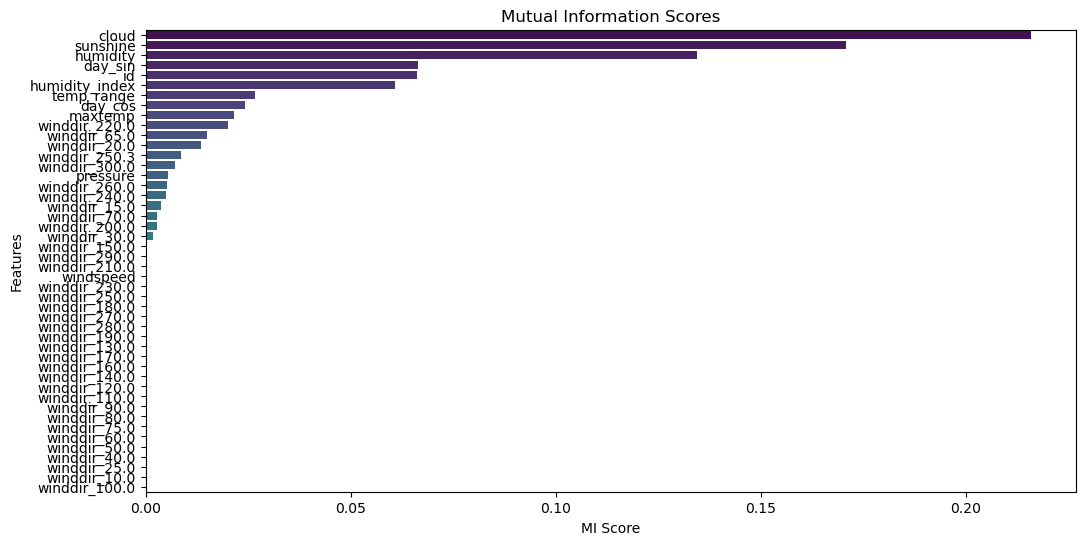

Dropping low impact features (MI < 0.01): ['winddir_250.3', 'winddir_300.0', 'pressure', 'winddir_260.0', 'winddir_240.0', 'winddir_15.0', 'winddir_70.0', 'winddir_200.0', 'winddir_30.0', 'winddir_150.0', 'winddir_290.0', 'winddir_210.0', 'windspeed', 'winddir_230.0', 'winddir_250.0', 'winddir_180.0', 'winddir_270.0', 'winddir_280.0', 'winddir_190.0', 'winddir_130.0', 'winddir_170.0', 'winddir_160.0', 'winddir_140.0', 'winddir_120.0', 'winddir_110.0', 'winddir_90.0', 'winddir_80.0', 'winddir_75.0', 'winddir_60.0', 'winddir_50.0', 'winddir_40.0', 'winddir_25.0', 'winddir_10.0', 'winddir_100.0']
Dropping wind direction features: ['winddir_10.0', 'winddir_15.0', 'winddir_20.0', 'winddir_25.0', 'winddir_30.0', 'winddir_40.0', 'winddir_50.0', 'winddir_60.0', 'winddir_65.0', 'winddir_70.0', 'winddir_75.0', 'winddir_80.0', 'winddir_90.0', 'winddir_100.0', 'winddir_110.0', 'winddir_120.0', 'winddir_130.0', 'winddir_140.0', 'winddir_150.0', 'winddir_160.0', 'winddir_170.0', 'winddir_180.0', 'wi

In [12]:
import Feature_selection as fs
import pandas as pd

# Load cleaned dataset
cleaned_train_path = "../Data/cleaned_train.csv"  # or local path
df_cleaned = pd.read_csv(cleaned_train_path)

# 1. Compute MI scores
mi_df = fs.compute_mutual_information(df_cleaned)
print(mi_df.head())

# 2. Plot MI scores
fs.plot_mi_scores(mi_df)

# 3. Drop low-impact features and wind direction features
df_refined = fs.drop_low_impact_features(df_cleaned, mi_df, threshold=0.01)

# 4. Save the refined dataset
refined_path = "../Data/refined_train.csv"
fs.save_refined_dataset(df_refined, refined_path)

# 5. Validate by loading and checking structure
df_refined_check = pd.read_csv(refined_path)
print(df_refined_check.shape)
print(df_refined_check.columns)